In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
year = 2020
#dati https://geodati.gov.it:443/geoportalRNDTPA/catalog/search/resource/details.page?uuid=PCM:COVID-19:05032020:093000
#aree https://geodati.gov.it/geoportalRNDTPA/catalog/search/resource/details.page?uuid=PCM:000086:20200306:110700
#dati nazionale https://github.com/pcm-dpc/COVID-19/tree/master/dati-andamento-nazionale
#dati regionale https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni
#dati province https://github.com/pcm-dpc/COVID-19/tree/master/dati-province

cvs_regione_fileurl = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
months_days=(('02','24'),('02','25'),('02','26'),('02','27'),('02','28'),('02','29'),
             ('03','01'),('03','02'),('03','03'),('03','04'),('03','05'),('03','06'),
             ('03','07'),('03','08'),('03','09'),('03','10'),('03','11'),('03','12'),
             ('03','13'),('03','14'),('03','15'),('03','16'),('03','17'),('03','18'),
             ('03','19'),('03','20'),('03','21'))


In [5]:
#data,stato,codice_regione,denominazione_regione,lat,long,
#1. ricoverati_con_sintomi,
#2. terapia_intensiva,3. totale_ospedalizzati, 4. isolamento_domiciliare,5.totale_attualmente_positivi,6.nuovi_attualmente_positivi,7.dimessi_guariti,8.deceduti,9.totale_casi,10.tamponi
#2020-02-24 18:00:00,ITA,13,Abruzzo,42.35122196,13.39843823,0,0,0,0,0,0,0,0,0,5
#2020-02-24 18:00:00,ITA,17,Basilicata,40.63947052,15.80514834,0,0,0,0,0,0,0,0,0,0
dtype_andamento_regionale="datetime64[s],S3,i8,S20,f8,f8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8"
dtype_data = np.dtype([('anno',np.int32),('mese',np.int32),('giorno',np.int32)])

In [6]:
rows_np = np.genfromtxt( 
        cvs_regione_fileurl,
        dtype = dtype_andamento_regionale,
        delimiter=',', 
        names=True)

array([('2020-02-24T18:00:00', b'ITA', 13, b'Abruzzo', 42.35122196, 13.39843823,    0,    0,     0,    0,     0,    0,    0,    0,     0,     5),
       ('2020-02-24T18:00:00', b'ITA', 17, b'Basilicata', 40.63947052, 15.80514834,    0,    0,     0,    0,     0,    0,    0,    0,     0,     0),
       ('2020-02-24T18:00:00', b'ITA',  4, b'P.A. Bolzano', 46.49933453, 11.35662422,    0,    0,     0,    0,     0,    0,    0,    0,     0,     1),
       ('2020-02-24T18:00:00', b'ITA', 18, b'Calabria', 38.90597598, 16.59440194,    0,    0,     0,    0,     0,    0,    0,    0,     0,     1),
       ('2020-02-24T18:00:00', b'ITA', 15, b'Campania', 40.83956555, 14.25084984,    0,    0,     0,    0,     0,    0,    0,    0,     0,    10),
       ('2020-02-24T18:00:00', b'ITA',  8, b'Emilia Romagna', 44.49436681, 11.3417208 ,   10,    2,    12,    6,    18,   18,    0,    0,    18,   148),
       ('2020-02-24T18:00:00', b'ITA',  6, b'Friuli Venezia Giuli', 45.6494354 , 13.76813649,    0,    0,  

In [10]:
rows_pd = pd.DataFrame(rows_np)
rows_pd.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,b'ITA',13,b'Abruzzo',42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,b'ITA',17,b'Basilicata',40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,b'ITA',4,b'P.A. Bolzano',46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,b'ITA',18,b'Calabria',38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,b'ITA',15,b'Campania',40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [13]:
# 8 = emilia romagna
rows_pd[rows_pd['codice_regione']==8]

KeyError: ('data', 'tamponi')

In [24]:
#day_slash_month = np.char.add(np.char.add(rows['giorno'].astype(np.unicode_), '/'), rows['mese'].astype(np.unicode_))
# day_slash_month_np = np.char.add(np.char.add(rows['giorno'].astype(np.unicode_), '/'), rows['mese'].astype(np.unicode_))
date_np = rows_np['data']
date_np

array(['2020-02-24T18:00:00', '2020-02-25T18:00:00',
       '2020-02-26T18:00:00', '2020-02-27T18:00:00',
       '2020-02-28T18:00:00', '2020-02-29T18:00:00',
       '2020-03-01T18:00:00', '2020-03-02T18:00:00',
       '2020-03-03T18:00:00', '2020-03-04T18:00:00',
       '2020-03-05T18:00:00', '2020-03-06T18:00:00',
       '2020-03-07T18:00:00', '2020-03-08T18:00:00',
       '2020-03-09T18:00:00', '2020-03-10T18:00:00',
       '2020-03-11T17:00:00', '2020-03-12T17:00:00',
       '2020-03-13T17:00:00', '2020-03-14T17:00:00',
       '2020-03-15T17:00:00', '2020-03-16T17:00:00',
       '2020-03-17T17:00:00', '2020-03-18T17:00:00',
       '2020-03-19T17:00:00', '2020-03-20T17:00:00',
       '2020-03-21T17:00:00'], dtype='datetime64[s]')

c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


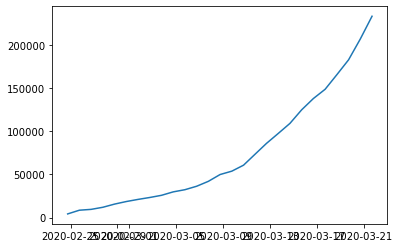

In [26]:
plt.plot(date_np, rows_np['tamponi'])

In [113]:
rows['totale_attualmente_positivi']

array([  221,   311,   385,   588,   821,  1049,  1577,  1835,  2263,
        2706,  3296,  3916,  5061,  6387,  7985,  8514, 10590, 12839,
       14955, 17750, 20603, 23073], dtype=int64)

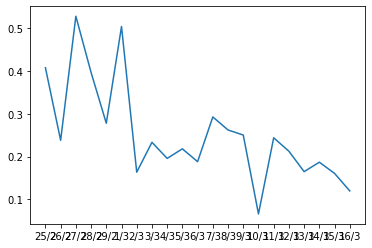

In [124]:
growth_daily_num = np.diff(rows['totale_attualmente_positivi'])
r_factor = growth_daily_num / rows['totale_attualmente_positivi'][:-1]
plt.plot(day_slash_month[1:],r_factor)

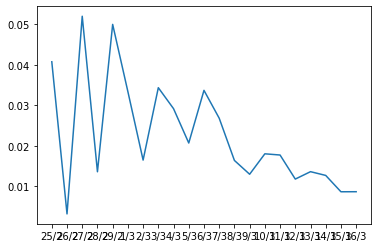

In [128]:
growth_daily_num_ti = np.diff(rows['terapia_intensiva'])
r_factor = growth_daily_num / rows['totale_attualmente_positivi'][:-1]
plt.plot(day_slash_month[1:],r_factor)

array([0.07086614, 0.00666667, 0.12195122, 0.02631579, 0.1002445 ,
       0.06916996, 0.03337612, 0.06938326, 0.05225653, 0.03412553,
       0.05184493, 0.03676471, 0.02579242, 0.01972902, 0.0285205 ,
       0.02552832, 0.01820565, 0.02242727, 0.02170436, 0.01557128,
       0.0157918 ])

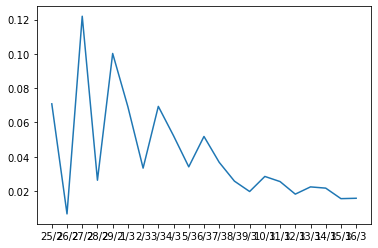

In [132]:
growth_daily_num_ti = np.diff(rows['totale_ospedalizzati'])
r_factor = growth_daily_num / rows['totale_ospedalizzati'][:-1]
plt.plot(day_slash_month[1:],r_factor)
r_factor

In [119]:
r_factor

array([0.40723982, 0.23794212, 0.52727273, 0.3962585 , 0.27771011,
       0.50333651, 0.16360178, 0.23324251, 0.19575784, 0.218034  ,
       0.1881068 , 0.29239019, 0.26200356, 0.25019571, 0.06624922,
       0.24383369, 0.21237016, 0.16481034, 0.18689402, 0.16073239,
       0.11988545])

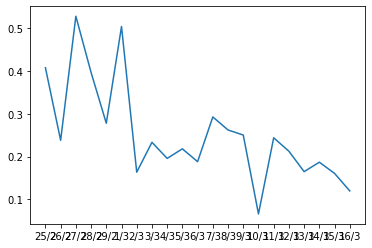

In [121]:
r_factor_mean = np.mean(r_factor)

In [122]:
r_factor_mean

0.252755592572651

In [123]:
221*((1+r_factor_mean)**21)

25094.90916138113